**Matrix Multiplication Performance Improvement**  
We changed from `std::vector<std::vector<int>>` to a single 1D array `std::vector<int>`, reducing execution time from 14055 ms to 6765 ms.  

We improved the cashe hit rate by insuring that we prossess the matrix mutiblication by row insted of colom by using ikj order of lopps and got improvement up to Execution time: 5118 ms.

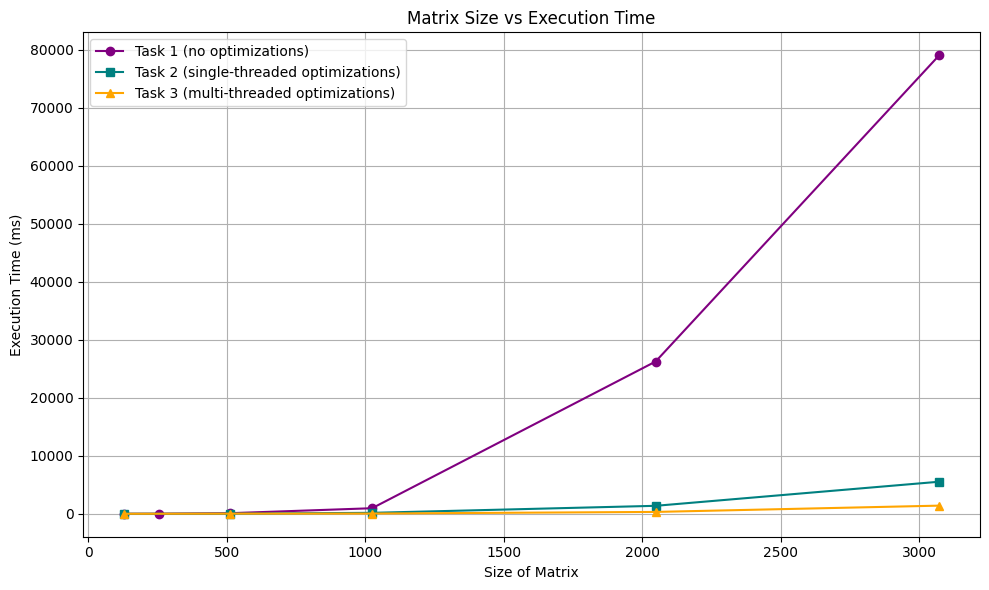

In [4]:
import matplotlib.pyplot as plt

task1_sizes = [128, 256, 512, 1024, 2048, 3072]
task1_times = [1, 10, 106, 960, 26250, 79035]

task2_sizes = [128, 512, 1024, 2048, 3072]
task2_times = [0, 19, 165, 1376, 5528]

task3_sizes = [128, 512, 1024, 2048, 3072]
task3_times = [0.999928, 26, 41, 322, 1406]


# Updated labels for the tasks
plt.figure(figsize=(10, 6))
plt.plot(task1_sizes, task1_times, marker='o', label='Task 1 (no optimizations)', color='purple')
plt.plot(task2_sizes, task2_times, marker='s', label='Task 2 (single-threaded optimizations)', color='teal')
plt.plot(task3_sizes, task3_times, marker='^', label='Task 3 (multi-threaded optimizations)', color='orange')

plt.title('Matrix Size vs Execution Time')
plt.xlabel('Size of Matrix')
plt.ylabel('Execution Time (ms)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Performance Analysis

As we can see on Figure 4, Task 1 (default naive  implementation) shows poor scaling, with execution time up to 79,035ms at 3072×3072 size matrix. Task 2's single-threaded optimizations deliver a big (almost 14x) speedup for large matrices through better memory access optimization. Task 3 is build on top of Task 2 optimizition and adds multi-threading to get the best results, processing the largest matrices up to 56x faster than baseline and 4x faster than the optimized single-threaded version.

| #   | Size of Matrix | Block Size | Avg. Kernel Execution Time (ms) |
| --- | -------------- | ---------- | ------------------------------- |
| 1   | 128            | 64         | 0                               |
| 2   | 512            | 64         | 19                              |
| 3   | 1024           | 64         | 165                             |
| 4   | 2048           | 64         | 1376                            |
| 5   | 3072           | 64         | 5528                            |


| #   | Size of Matrix | Block Size | Avg. Kernel Execution Time (ms) |
| --- | -------------- | ---------- | ------------------------------- |
| 1   | 128            | 256        | 0.999928                        |
| 2   | 512            | 256        | 26                              |
| 3   | 1024           | 512        | 41                              |
| 4   | 2048           | 512        | 322                             |
| 5   | 3072           | 256        | 1406                            |

| #   | Size of Matrix | Avg. Kernel Execution Time (ms) |
| --- | -------------- | ------------------------------- |
| 1   | 128            | 1                               |
| 2   | 256            | 10                              |
| 3   | 512            | 106                             |
| 4   | 1024           | 960                             |
| 5   | 2048           | 26250                           |
| 6   | 3072           | 79035                           |